In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lin=linear_model.LinearRegression()
from sklearn import metrics
from sklearn.linear_model import Lasso
lasso=Lasso()
from sklearn.linear_model import Ridge
rd=Ridge()
from xgboost import XGBRegressor
xgbr=XGBRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [2]:
dt=pd.read_csv(r"C:\Users\Admin\Desktop\honey_purity_dataset.csv")
dt

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


In [3]:
dt.shape

(247903, 11)

In [4]:
dt.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [5]:
dt.dtypes

CS                 float64
Density            float64
WC                 float64
pH                 float64
EC                 float64
F                  float64
G                  float64
Pollen_analysis     object
Viscosity          float64
Purity             float64
Price              float64
dtype: object

In [6]:
dt.Pollen_analysis.value_counts()

Pollen_analysis
Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: count, dtype: int64

In [7]:
dt.Pollen_analysis=le.fit_transform(dt.Pollen_analysis)

# Visualization

In [8]:
dt.head(2)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85


<Axes: xlabel='Price', ylabel='Count'>

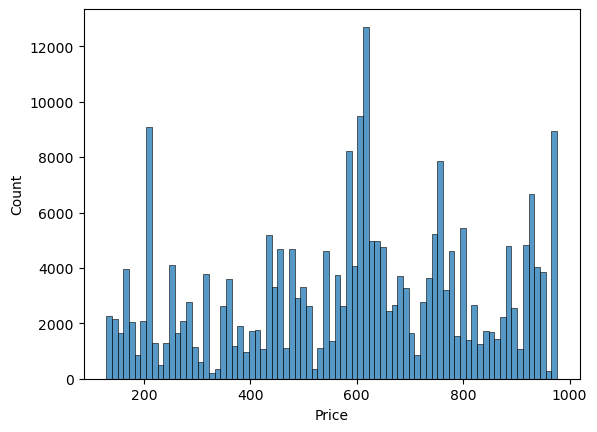

In [9]:
sns.histplot(data=dt,x="Price")   #shows the frequency distribution of data

<Axes: xlabel='Viscosity', ylabel='Count'>

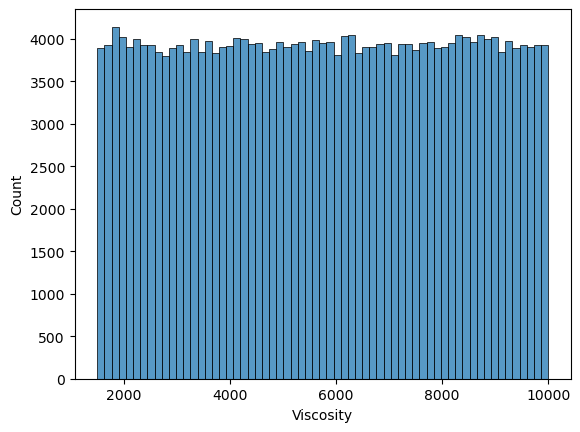

In [10]:
sns.histplot(data=dt,x="Viscosity")

<Axes: xlabel='Density', ylabel='Count'>

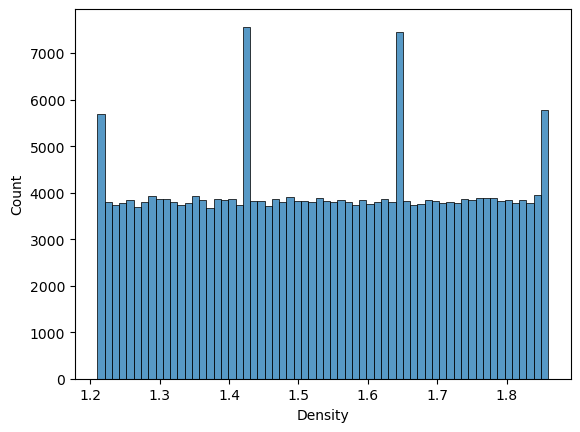

In [11]:
sns.histplot(data=dt,x="Density")

<Axes: xlabel='F', ylabel='Count'>

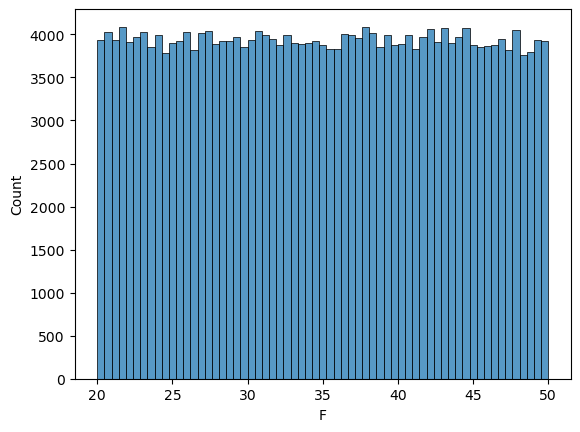

In [12]:
sns.histplot(data=dt,x="F")

<Axes: xlabel='Price', ylabel='Density'>

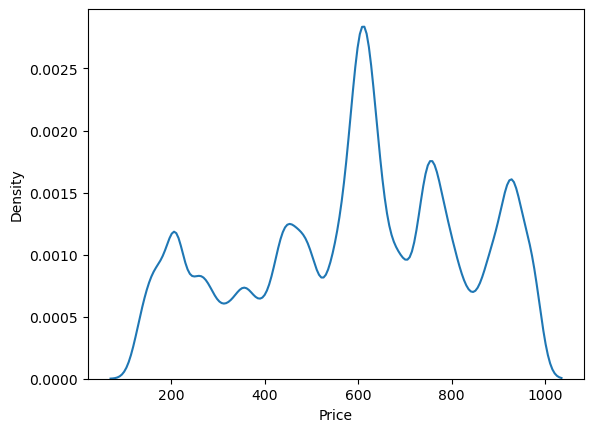

In [13]:
sns.kdeplot(data=dt,x="Price") # shows the prob. density function 

<Axes: xlabel='Density', ylabel='Density'>

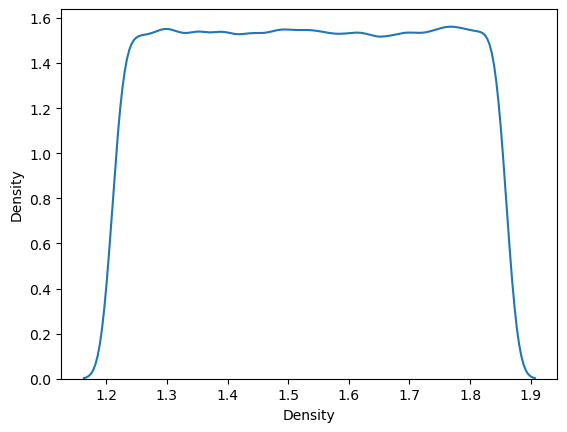

In [14]:
sns.kdeplot(data=dt,x="Density")

<Axes: xlabel='WC'>

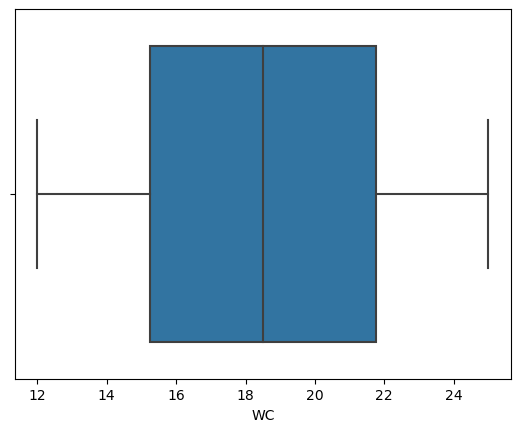

In [15]:
sns.boxplot(x="WC",data=dt) # shows how data is distributed and whether data has any outliers or not

# Model Building

In [16]:
# Linear Regression ()

In [17]:
dt.head(2)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85


In [18]:
x=dt.iloc[:,:-1]
y=dt.iloc[:,-1]

In [19]:
px_train,px_test,py_train,py_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
px_train.shape,px_test.shape, py_train.shape ,py_test.shape

((198322, 10), (49581, 10), (198322,), (49581,))

In [21]:
lin.fit(px_train,py_train)

LinearRegression()

In [22]:
p1=lin.predict(px_test)
p1

array([680.42171772, 662.16564916, 659.61542974, ..., 496.80694495,
       466.43238175, 702.73395275])

In [23]:
lin.intercept_

-8.637737601263666

In [24]:
lin.coef_

array([ 4.46602117e-02, -3.49391280e+00, -7.98731341e-02, -1.73846629e-02,
       -3.30200840e+00, -7.24127561e-02, -1.26117523e-01,  2.38995341e+00,
        4.08049194e-04,  7.22502190e+02])

In [25]:
r2=lin.score(px_train,py_train) # coe of determination is a measure that provides information about the goodness of fit of model.
r2

0.18969084632298305

In [26]:
adj_r2=1-(((1-r2)*(198322-1))/(198322-10-1))#is a modified version of r2 that adjusted for the no of predictor in the mo
adj_r2                        # predictor in the model    

0.18964998579816705

In [27]:
mse=metrics.mean_squared_error(py_test,p1)
mse # measures the average squared diff between the predicted and actual target values within set

44091.65008188506

In [28]:
rmse=pow(mse,0.5)
rmse

209.98011830143602

In [29]:
df1=pd.DataFrame({"Actual":py_test,"Predicted":p1})
df1

,Actual,Predicted
90455,915.33,680.421718
150666,853.98,662.165649
78138,817.18,659.615430
7105,600.73,446.152273
239230,750.31,627.833717
...,...,...
232127,474.29,450.563221
157022,166.35,484.737204
127405,614.94,496.806945
192797,160.06,466.432382


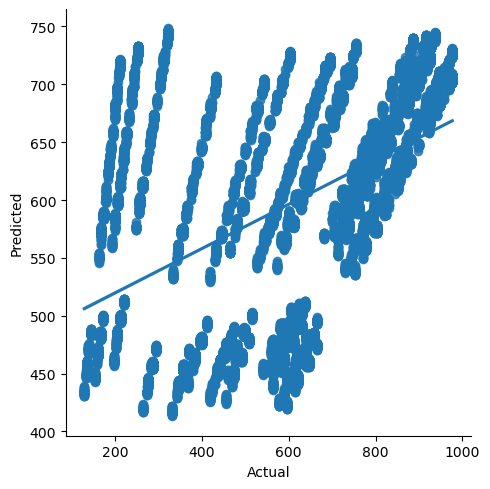

In [30]:
sns.lmplot(data=df1,x="Actual",y="Predicted")

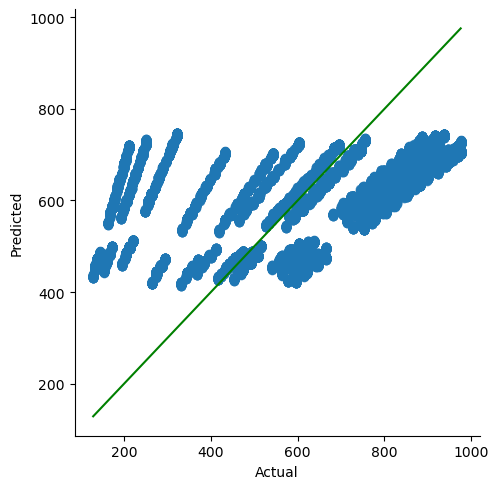

In [31]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")

# Lasso

In [32]:
lasso.fit(px_train,py_train)

Lasso()

In [33]:
p2=lasso.predict(px_test)
p2

array([673.14264993, 655.97150597, 654.76918898, ..., 502.43595671,
       474.16064233, 695.4568847 ])

In [34]:
lasso.coef_

array([ 1.29234954e-01, -0.00000000e+00, -6.44501780e-02, -7.04417252e-01,
       -0.00000000e+00, -6.04841832e-02, -1.07519958e-01,  2.36423563e+00,
        4.45443645e-04,  6.69779523e+02])

In [35]:
df2=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x)})
df2

,Importances,Columns
0,0.129235,CS
1,-0.000000,Density
2,-0.064450,WC
3,-0.704417,pH
4,-0.000000,EC
5,-0.060484,F
6,-0.107520,G
7,2.364236,Pollen_analysis
8,0.000445,Viscosity
9,669.779523,Purity


In [36]:
lr2=lasso.score(px_train,py_train)
lr2

0.18871921666824376

In [37]:
adjlr2=1-(((1-lr2)*(198322-1))/(198322-10-1))
adjlr2

0.18867830714818012

In [38]:
result=pd.DataFrame({"actual":py_test,"predicted":p2})
result

,actual,predicted
90455,915.33,673.142650
150666,853.98,655.971506
78138,817.18,654.769189
7105,600.73,457.090703
239230,750.31,626.580463
...,...,...
232127,474.29,459.083329
157022,166.35,493.908137
127405,614.94,502.435957
192797,160.06,474.160642


In [39]:
mse1=metrics.mean_squared_error(py_test,p2)
mse1

44157.26230567004

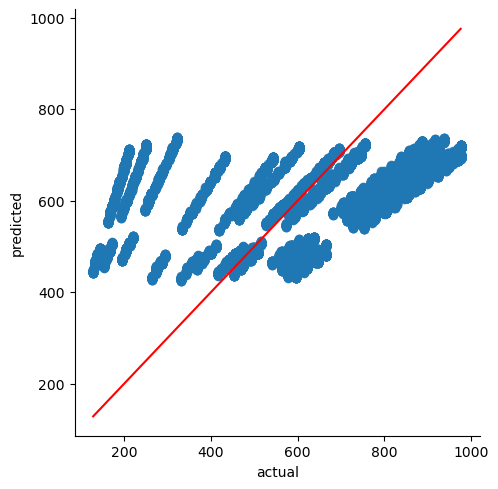

In [40]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [41]:
rd.fit(px_train,py_train)

Ridge()

In [42]:
p3=rd.predict(px_test)
p3

array([680.39031617, 662.13907786, 659.59812938, ..., 496.83816192,
       466.46599366, 702.71077349])

In [43]:
list(rd.coef_)

[0.045554645329225076,
 -3.509593728438948,
 -0.08008512713552081,
 -0.021835344955237777,
 -3.2971622689275772,
 -0.07241689059353695,
 -0.12611815421550832,
 2.389980724908292,
 0.0004081810176732494,
 722.3002341057241]

In [44]:
d1=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x)})
d1

,Coeff,columns
0,0.045555,CS
1,-3.509594,Density
2,-0.080085,WC
3,-0.021835,pH
4,-3.297162,EC
5,-0.072417,F
6,-0.126118,G
7,2.389981,Pollen_analysis
8,0.000408,Viscosity
9,722.300234,Purity


In [45]:
rdr2=rd.score(px_train,py_train)
rdr2

0.1896908328456316

In [46]:
rda_r2=1-(((1-rdr2)*(198322-1))/(198322-10-1))
rda_r2

0.18964997232013603

In [47]:
mse2=metrics.mean_squared_error(py_test,p3)
mse2

44091.6786315252

# XGB Regressor

In [48]:
xgbr.fit(px_train,py_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
p4=xgbr.predict(px_test)

In [50]:
xgb_r2=xgbr.score(px_train,py_train)
xgb_r2

0.9999917109311377

In [51]:
xgb_adjr2=1-(((1-xgb_r2)*( 198322-1))/(198322-10-1))
xgb_adjr2

0.9999917105131544

In [52]:
xgb_MSE=metrics.mean_squared_error(py_test,p4)
xgb_MSE

0.48973904215832337

In [53]:
dff1=pd.DataFrame({"Actual":py_test,"Predicted":p4})
df1

,Actual,Predicted
90455,915.33,680.421718
150666,853.98,662.165649
78138,817.18,659.615430
7105,600.73,446.152273
239230,750.31,627.833717
...,...,...
232127,474.29,450.563221
157022,166.35,484.737204
127405,614.94,496.806945
192797,160.06,466.432382


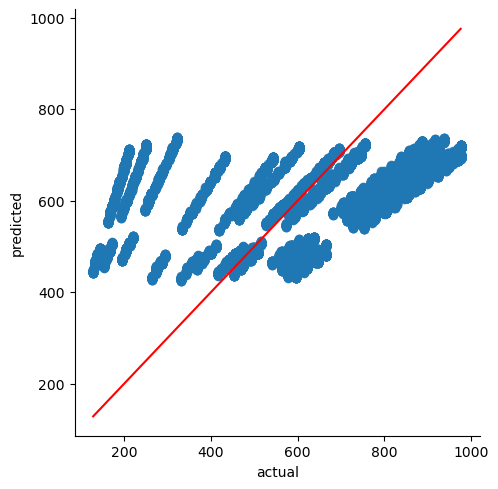

In [54]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Random Forest Regressor

In [55]:
rf.fit(px_train,py_train)

RandomForestRegressor()

In [56]:
p5=rf.predict(px_test)

In [57]:
rf_r2=rf.score(px_train,py_train)
rf_r2

0.9999999548680092

In [58]:
rf_adjr2=1-(((1-rf_r2)*(198322-1))/( 198322-10-1))
rf_adjr2

0.9999999548657333

In [59]:
dt_MSE=metrics.mean_squared_error(py_test,p5)
dt_MSE

0.0162290330874738

In [60]:
dff=pd.DataFrame({"Actual":py_test,"Predicted":p5})
dff

,Actual,Predicted
90455,915.33,915.33
150666,853.98,853.98
78138,817.18,817.18
7105,600.73,600.73
239230,750.31,750.31
...,...,...
232127,474.29,474.29
157022,166.35,166.35
127405,614.94,614.94
192797,160.06,160.06


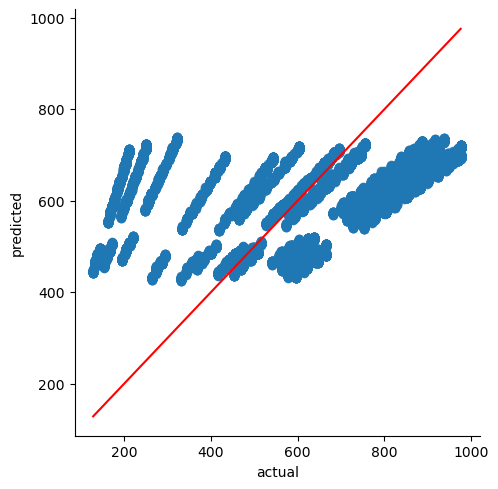

In [61]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

In [62]:
l1=["Linear","Lasso","Ridge","XGB","Random_Forest"]
l2=[r2,lr2,rdr2,xgb_r2,rf_r2]
l3=[adj_r2,adjlr2,rda_r2,xgb_adjr2,rf_adjr2]
l4=[mse,mse1,mse2,xgb_MSE,dt_MSE]

In [63]:
final=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.189691,0.189650,44091.650082
1,Lasso,0.188719,0.188678,44157.262306
2,Ridge,0.189691,0.189650,44091.678632
3,XGB,0.999992,0.999992,0.489739
4,Random_Forest,1.000000,1.000000,0.016229


# Outlier Treatment

In [64]:
dt.head(2)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85


<Axes: >

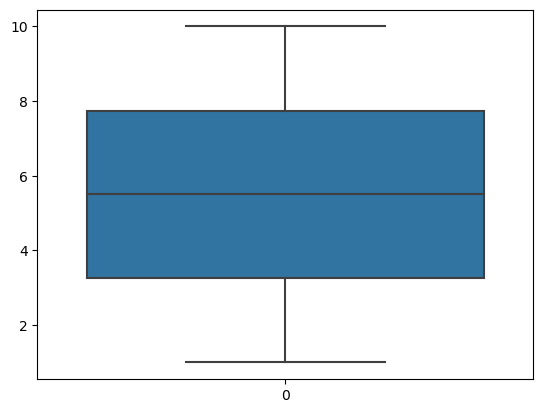

In [65]:
sns.boxplot(dt["CS"])

<Axes: >

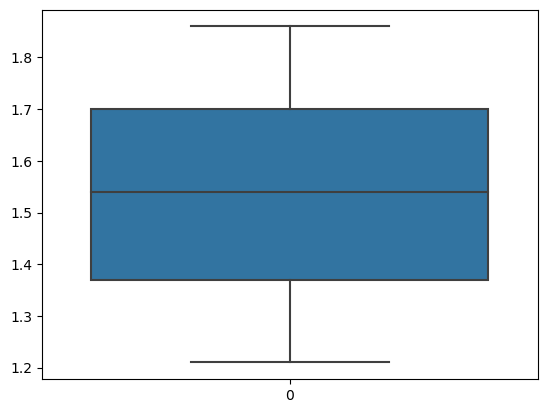

In [66]:
sns.boxplot(dt["Density"])

<Axes: >

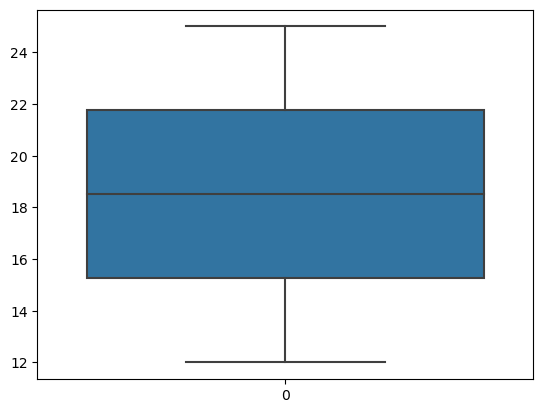

In [67]:
sns.boxplot(dt["WC"])

<Axes: >

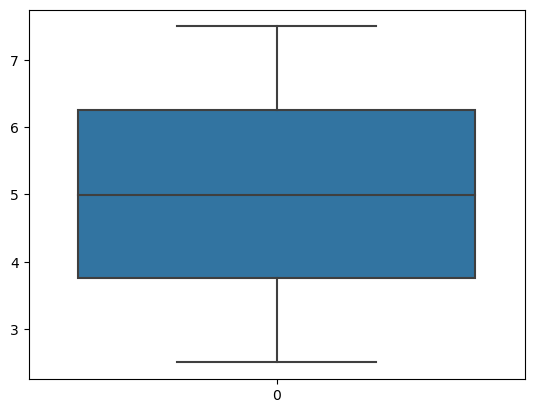

In [68]:
sns.boxplot(dt["pH"])

<Axes: >

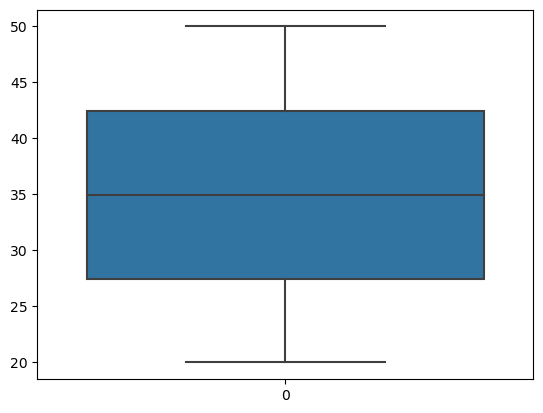

In [69]:
sns.boxplot(dt["F"])

<Axes: >

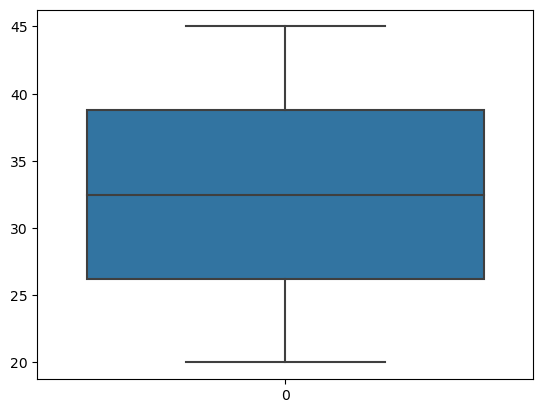

In [70]:
sns.boxplot(dt["G"])

<Axes: >

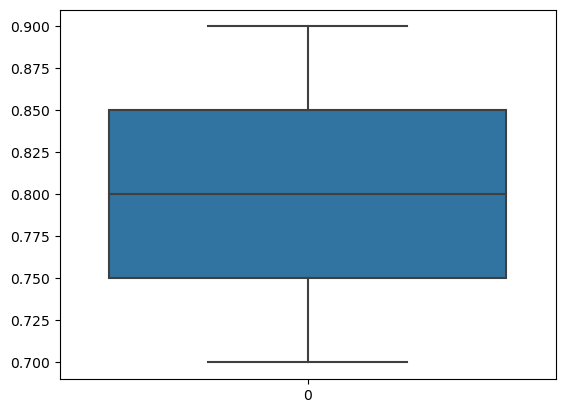

In [71]:
sns.boxplot(dt["EC"])

<Axes: >

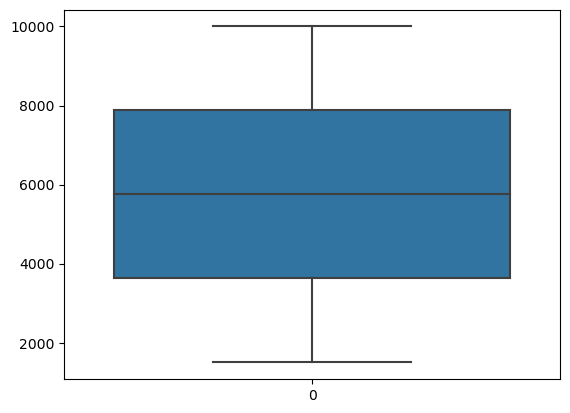

In [72]:
sns.boxplot(dt["Viscosity"])

<Axes: >

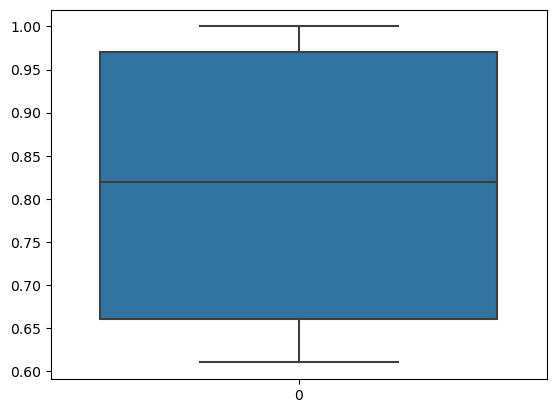

In [73]:
sns.boxplot(dt["Purity"])

In [74]:
dt.skew()

CS                 0.000062
Density           -0.000805
WC                -0.002823
pH                 0.002843
EC                 0.000804
F                  0.000789
G                 -0.000315
Pollen_analysis    0.001020
Viscosity         -0.003851
Purity            -0.071791
Price             -0.244702
dtype: float64

# Model Building

In [75]:
dt.head(2)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85


In [76]:
c=dt.corr()

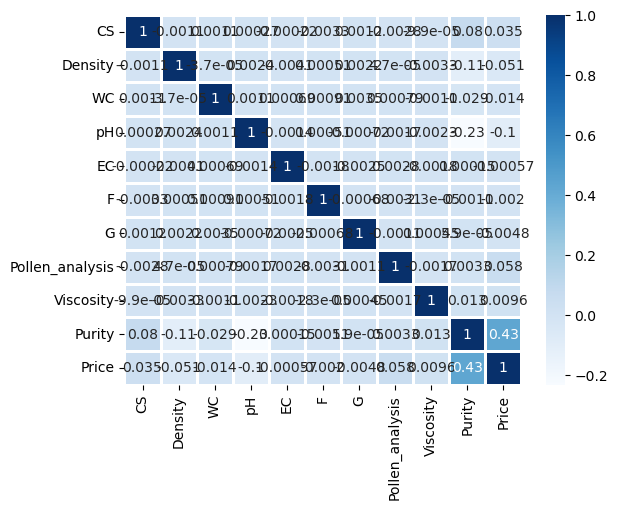

In [77]:
heatmap=sns.heatmap(c,linewidth=1 ,annot=True ,cmap=plt.cm. Blues)

In [78]:
x1=dt.iloc[:,:-1]
y1=dt.iloc[:,-1]

In [79]:
x1.head(2)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89


In [80]:
y1.head(2)

0    645.24
1    385.85
Name: Price, dtype: float64

In [81]:
px1_train,px1_test,py1_train,py1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [82]:
px1_train.shape,px1_test.shape,py1_train.shape,py1_test.shape

((198322, 10), (49581, 10), (198322,), (49581,))

In [83]:
lin.fit(px1_train,py1_train)

LinearRegression()

In [84]:
p6=lin.predict(px1_test)
p6

array([680.42171772, 662.16564916, 659.61542974, ..., 496.80694495,
       466.43238175, 702.73395275])

In [85]:
l_r2=lin.score(px1_train,py1_train)
l_r2

0.18969084632298305

In [86]:
l_adj_r2=1-(((1-r2)*(198322-1))/(198322-10-1))
l_adj_r2

0.18964998579816705

In [87]:
l_mse=metrics.mean_squared_error(py1_test,p6)
l_mse

44091.65008188506

In [88]:
l_rmse=pow(l_mse,0.5)
l_rmse

209.98011830143602

In [89]:
df6=pd.DataFrame({"Actual":py1_test,"Predicted":p6})
df6

,Actual,Predicted
90455,915.33,680.421718
150666,853.98,662.165649
78138,817.18,659.615430
7105,600.73,446.152273
239230,750.31,627.833717
...,...,...
232127,474.29,450.563221
157022,166.35,484.737204
127405,614.94,496.806945
192797,160.06,466.432382


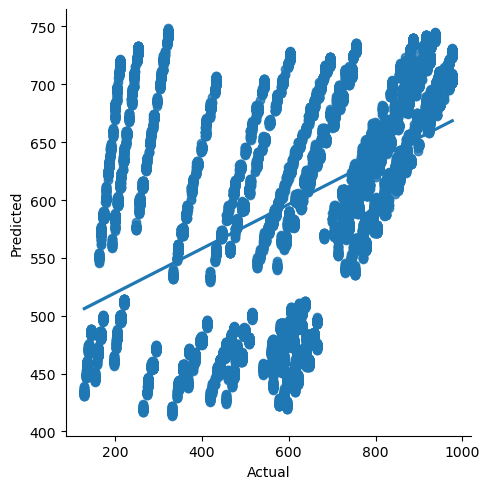

In [90]:
sns.lmplot(data=df6,x="Actual",y="Predicted")

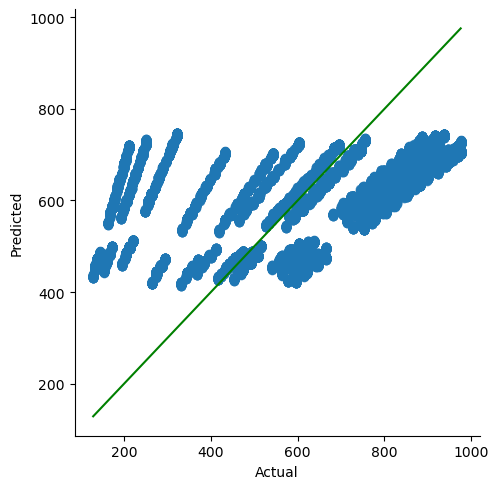

In [91]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df6.min().min(),df6.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")

# Lasso

In [92]:
lasso.fit(px1_train,py1_train)

Lasso()

In [93]:
p7=lasso.predict(px1_test)
p7

array([673.14264993, 655.97150597, 654.76918898, ..., 502.43595671,
       474.16064233, 695.4568847 ])

In [94]:
lasso.coef_

array([ 1.29234954e-01, -0.00000000e+00, -6.44501780e-02, -7.04417252e-01,
       -0.00000000e+00, -6.04841832e-02, -1.07519958e-01,  2.36423563e+00,
        4.45443645e-04,  6.69779523e+02])

In [95]:
df7=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df7

,Importances,Columns
0,0.129235,CS
1,-0.000000,Density
2,-0.064450,WC
3,-0.704417,pH
4,-0.000000,EC
5,-0.060484,F
6,-0.107520,G
7,2.364236,Pollen_analysis
8,0.000445,Viscosity
9,669.779523,Purity


In [96]:
la_r2=lasso.score(px1_train,py1_train)
la_r2

0.18871921666824376

In [97]:
adjlar2=1-(((1-la_r2)*(198322-1))/(198322-10-1))
adjlar2

0.18867830714818012

In [98]:
result=pd.DataFrame({"actual":py1_test,"predicted":p7})
result

,actual,predicted
90455,915.33,673.142650
150666,853.98,655.971506
78138,817.18,654.769189
7105,600.73,457.090703
239230,750.31,626.580463
...,...,...
232127,474.29,459.083329
157022,166.35,493.908137
127405,614.94,502.435957
192797,160.06,474.160642


In [99]:
mse_la=metrics.mean_squared_error(py1_test,p7)
mse_la

44157.26230567004

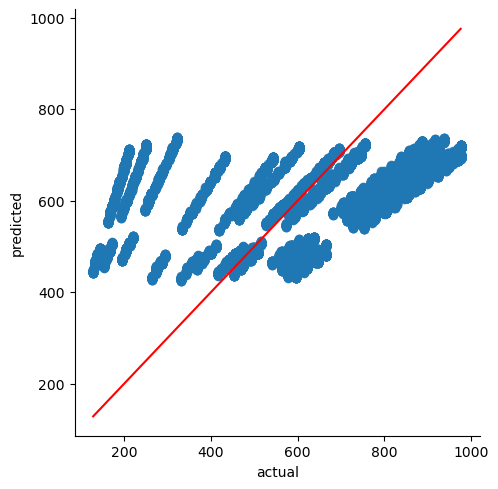

In [100]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [101]:
rd.fit(px1_train,py1_train)

Ridge()

In [102]:
p8=rd.predict(px1_test)

In [103]:
list(rd.coef_)

[0.045554645329225076,
 -3.509593728438948,
 -0.08008512713552081,
 -0.021835344955237777,
 -3.2971622689275772,
 -0.07241689059353695,
 -0.12611815421550832,
 2.389980724908292,
 0.0004081810176732494,
 722.3002341057241]

In [104]:
d_1=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x1)})
d_1

,Coeff,columns
0,0.045555,CS
1,-3.509594,Density
2,-0.080085,WC
3,-0.021835,pH
4,-3.297162,EC
5,-0.072417,F
6,-0.126118,G
7,2.389981,Pollen_analysis
8,0.000408,Viscosity
9,722.300234,Purity


In [105]:
rd_r2=rd.score(px1_train,py1_train)
rd_r2

0.1896908328456316

In [106]:
rdadj_r2=1-(((1-rd_r2)*(198322-1))/(198322-10-1))
rdadj_r2

0.18964997232013603

In [107]:
mse_rd=metrics.mean_squared_error(py1_test,p8)
mse_rd

44091.6786315252

# XGB Regressor

In [108]:
xgbr.fit(px1_train,py1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
p9=xgbr.predict(px1_test)

In [110]:
xgb_r_2=xgbr.score(px1_train,py1_train)
xgb_r_2

0.9999917109311377

In [111]:
xgb_adjr_2=1-(((1-xgb_r_2)*( 198322-1))/(198322-10-1))
xgb_adjr_2

0.9999917105131544

In [112]:
xgb_MSE1=metrics.mean_squared_error(py1_test,p9)
xgb_MSE1

0.48973904215832337

# Random Forest Regressor

In [113]:
rf.fit(px1_train,py1_train)

RandomForestRegressor()

In [114]:
p10=rf.predict(px1_test)

In [115]:
rf_r_2=rf.score(px1_train,py1_train)
rf_r_2

0.9999999536930209

In [116]:
rf_adjr_2=1-(((1-rf_r_2)*(198322-1))/( 198322-10-1))
rf_adjr_2

0.9999999536906858

In [117]:
rf_MSE=metrics.mean_squared_error(py1_test,p10)
rf_MSE

0.01710501199673367

In [118]:
result1=pd.DataFrame({"actual":py1_test,"predicted":p10})
result1

,actual,predicted
90455,915.33,915.33
150666,853.98,853.98
78138,817.18,817.18
7105,600.73,600.73
239230,750.31,750.31
...,...,...
232127,474.29,474.29
157022,166.35,166.35
127405,614.94,614.94
192797,160.06,160.06


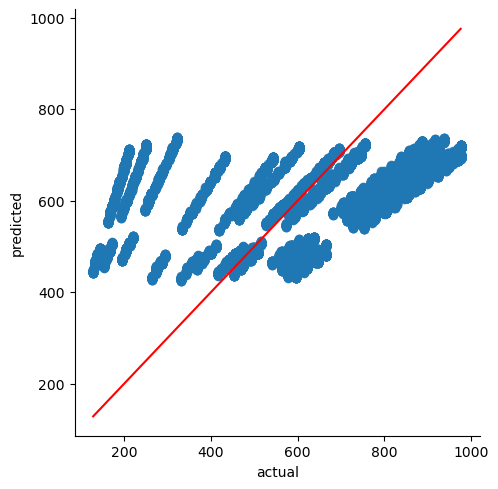

In [119]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

In [120]:
l5=["Linear","Lasso","Ridge","XGB","Random Forest"]
l6=[l_r2,la_r2,rd_r2,xgb_r_2,rf_r_2]
l7=[l_adj_r2,adjlar2,rdadj_r2,xgb_adjr_2,rf_adjr_2]
l8=[l_mse,mse_la,mse_rd,xgb_MSE1,rf_MSE]

In [121]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.189691,0.189650,44091.650082
1,Lasso,0.188719,0.188678,44157.262306
2,Ridge,0.189691,0.189650,44091.678632
3,XGB,0.999992,0.999992,0.489739
4,Random Forest,1.000000,1.000000,0.017105


# Feature Selection

In [122]:
dt.columns

Index(['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Pollen_analysis',
       'Viscosity', 'Purity', 'Price'],
      dtype='object')

In [123]:
df_2=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df_2

,Importances,Columns
0,0.129235,CS
1,-0.000000,Density
2,-0.064450,WC
3,-0.704417,pH
4,-0.000000,EC
5,-0.060484,F
6,-0.107520,G
7,2.364236,Pollen_analysis
8,0.000445,Viscosity
9,669.779523,Purity


In [124]:
bf1=dt.drop(["Density","EC"],axis=1)

In [125]:
x2=bf1.iloc[:,:-1]
y2=bf1.iloc[:,-1]

In [126]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=101)

In [127]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((198322, 8), (49581, 8), (198322,), (49581,))

In [128]:
lin.fit(x2_tr,y2_tr)

LinearRegression()

In [129]:
pr1=lin.predict(x2_te)
pr1

array([680.69621492, 661.93680013, 659.69814784, ..., 495.39774286,
       465.44918607, 702.87817333])

In [130]:
lin.intercept_

-17.139270414939347

In [131]:
n_R2=lin.score(x2_tr,y2_tr)
n_R2

0.1896823885523482

In [132]:
n_adj_R2=1-(((1-n_R2)*(198322-1))/(198322-8-1))
n_adj_R2

0.1896497001209716

In [133]:
n_MSE=metrics.mean_squared_error(y2_te,pr1)
n_MSE

44093.18360237598

# XG Boost Regressor

In [134]:
xgbr.fit(x2_tr,y2_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
p11=xgbr.predict(x2_te)

In [136]:
XGB_r_2=xgbr.score(x2_tr,y2_tr)
XGB_r_2

0.9999922839260263

In [137]:
XGB_adjr_2=1-(((1-xgb_r_2)*( 198322-1))/(198322-8-1))
XGB_adjr_2

0.9999917105967544

In [138]:
XGB_MSE1=metrics.mean_squared_error(y2_te,p11)
XGB_MSE1

0.4547683642987561

In [139]:
l5=["Linear","Lasso","Ridge","XGB","Random Forest","Feature Selection","XGB"]
l6=[l_r2,la_r2,rd_r2,xgb_r_2,rf_r_2,n_R2,XGB_r_2]
l7=[l_adj_r2,adjlar2,rdadj_r2,xgb_adjr_2,rf_adjr_2,n_adj_R2,XGB_adjr_2]
l8=[l_mse,mse_la,mse_rd,xgb_MSE1,rf_MSE,n_MSE,XGB_MSE1]

In [140]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.189691,0.189650,44091.650082
1,Lasso,0.188719,0.188678,44157.262306
2,Ridge,0.189691,0.189650,44091.678632
3,XGB,0.999992,0.999992,0.489739
4,Random Forest,1.000000,1.000000,0.017105
5,Feature Selection,0.189682,0.189650,44093.183602
6,XGB,0.999992,0.999992,0.454768


In [141]:
# The conclusion from above dataset is XGB regressor is best suited for this data set.

In [142]:
df_f=pd.DataFrame({"Actual":y2_te,"Predicted":p11})
df_f

,Actual,Predicted
90455,915.33,914.744446
150666,853.98,853.132812
78138,817.18,816.664551
7105,600.73,600.609253
239230,750.31,749.859314
...,...,...
232127,474.29,473.967010
157022,166.35,166.316803
127405,614.94,614.712952
192797,160.06,159.840912


<Axes: xlabel='Actual', ylabel='Predicted'>

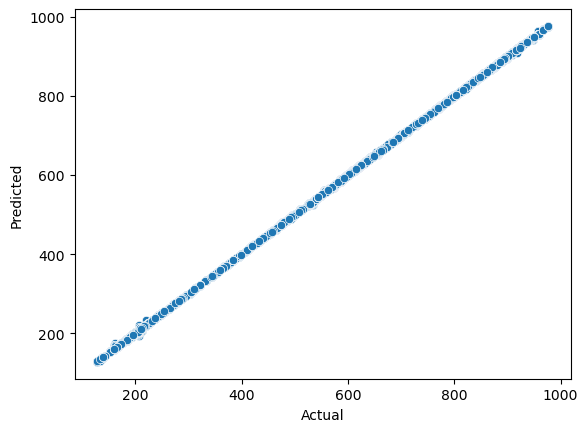

In [143]:
sns.scatterplot(x="Actual",y="Predicted",data=df_f)